## Part 1: Exploratory Data Analysis

logins.json file has simulated timestamps of user logins from geographic locations. They need to be aggregated in 15 minute intervals then visualized in a way that characterizes the underlying patterns of the data.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import json
from datetime import timedelta
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [33]:
df_raw = pd.read_json(r"logins.json")

In [34]:
df_raw.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [35]:
logins = df_raw.resample("15min", on = "login_time").count()

In [36]:
logins.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [37]:
logins.index.name = "idx"
logins.reset_index(inplace=True)
logins.rename({"login_time":"logins"}, axis=1, inplace=True)

logins.head()

,idx,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [38]:
# Extract hour and day name

logins['hour'] = logins["idx"].dt.hour
logins['day'] = logins['idx'].dt.day_name()

In [39]:
night_day = [lambda row: "AM" if row in range(0, 12) else "PM"]

In [40]:
logins['AM_PM'] = logins.hour.apply(night_day)

logins.head()

,idx,logins,hour,day,AM_PM
0,1970-01-01 20:00:00,2,20,Thursday,PM
1,1970-01-01 20:15:00,6,20,Thursday,PM
2,1970-01-01 20:30:00,9,20,Thursday,PM
3,1970-01-01 20:45:00,7,20,Thursday,PM
4,1970-01-01 21:00:00,1,21,Thursday,PM


In [41]:
day_logins = logins.groupby("day").sum()[['logins']]

day_logins['daily_avg'] = logins.groupby('day').mean()[['logins']]

In [42]:
day_logins.head(7)

,logins,daily_avg
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


We have daily logins and average daily logins. Can also look at logins on an average hourly basis.

In [43]:
hourly = logins.groupby("hour").sum()[['logins']]
hourly['hourly_avg'] = logins.groupby("hour").mean()[['logins']]

In [44]:
hourly.head()

,logins,hourly_avg
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235


In [45]:
hourly.head(24)

,logins,hourly_avg
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235
5,2945,7.218137
6,1138,2.789216
7,815,1.997549
8,818,2.004902


Another way to look at the breakdown is by day and night for each day. An example of a hypothesis before looking at the data would be "People tend to go out at night on the weekends, therefore we should see a trend for it."

In [46]:
time_day = logins.groupby(['day','AM_PM']).sum()[['logins']]
time_day['average'] = logins.groupby(['day','AM_PM']).mean()[['logins']]

In [47]:
time_day.head(14)

logins    average
day       AM_PM                   
Friday    AM       5924   8.227778
          PM       9284  12.894444
Monday    AM       3905   5.423611
          PM       4918   7.025714
Saturday  AM      10217  14.190278
          PM       9160  12.722222
Sunday    AM      10351  14.376389
          PM       7816  10.855556
Thursday  AM       5153   7.668155
          PM       6807   9.893895
Tuesday   AM       3961   5.894345
          PM       5307   7.897321
Wednesday AM       4570   6.800595
          PM       5769   8.584821

In [48]:
df_hr_day = logins.groupby(['hour', 'day']).mean().reset_index()

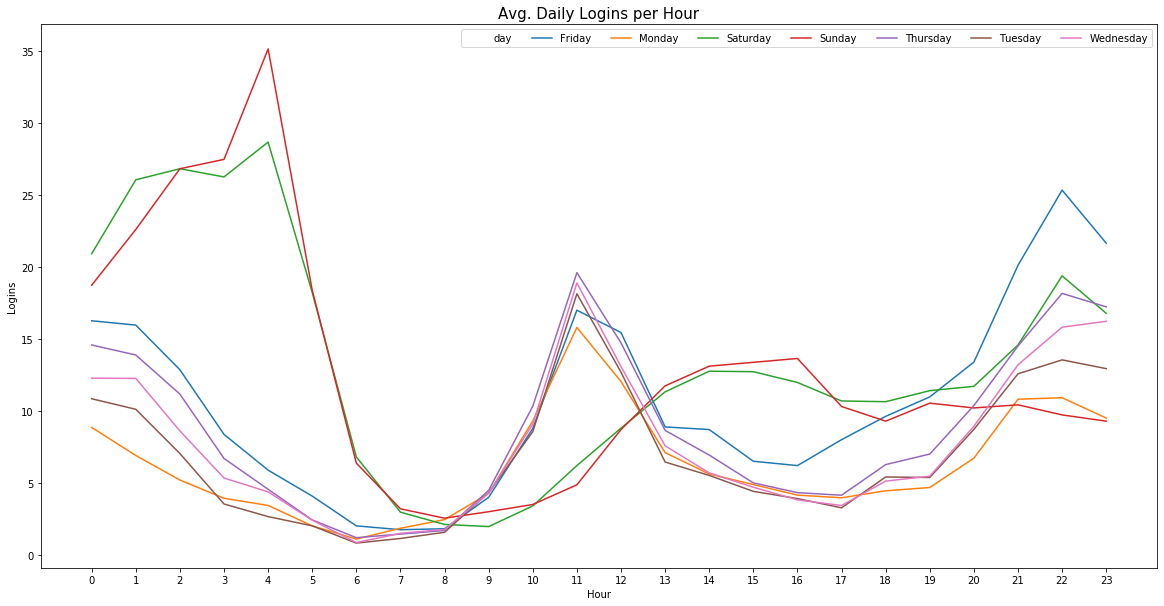

In [49]:
# plotting new dataframe

fig, axes = plt.subplots(figsize = (20, 10))
ax = sns.lineplot(x = 'hour', y = 'logins', data = df_hr_day, hue = 'day')
ax.legend(loc='upper right', ncol=8)
#ax.set(title = 'Avg. Daily Logins per Hour')
plt.title("Avg. Daily Logins per Hour", size = 15)
plt.xlabel("Hour", size = 10)
plt.ylabel("Logins", size = 10)
plt.xticks(range(0, 24))

plt.show()

Some interesting trends. A few days have spikes in the middle of the day while Saturday and Sunday have a large spike early in the morning. Friday also has a spike late in the day.

In [50]:
daily = df_raw.resample("12H", on = 'login_time').count()

In [51]:
daily.head()

,login_time
login_time,
1970-01-01 12:00:00,112
1970-01-02 00:00:00,291
1970-01-02 12:00:00,390
1970-01-03 00:00:00,402
1970-01-03 12:00:00,391


In [52]:
# Quick data manipulation

daily.index.name = "idx"
daily.reset_index(inplace = True)
daily.rename({'login_time':'daily'}, axis = 1, inplace = True)

In [53]:
daily.head()

,idx,daily
0,1970-01-01 12:00:00,112
1,1970-01-02 00:00:00,291
2,1970-01-02 12:00:00,390
3,1970-01-03 00:00:00,402
4,1970-01-03 12:00:00,391


In [54]:
daily['month'] = daily['idx'].dt.month
daily['month'] = daily['month'].map({1: "January",
                                    2: "February",
                                    3: "March",
                                    4: "April",
                                    5: "May",
                                    6: "June",
                                    7: "July",
                                    8: "August",
                                    9: "September",
                                    10: "October",
                                    11: "November",
                                    12: "December"})

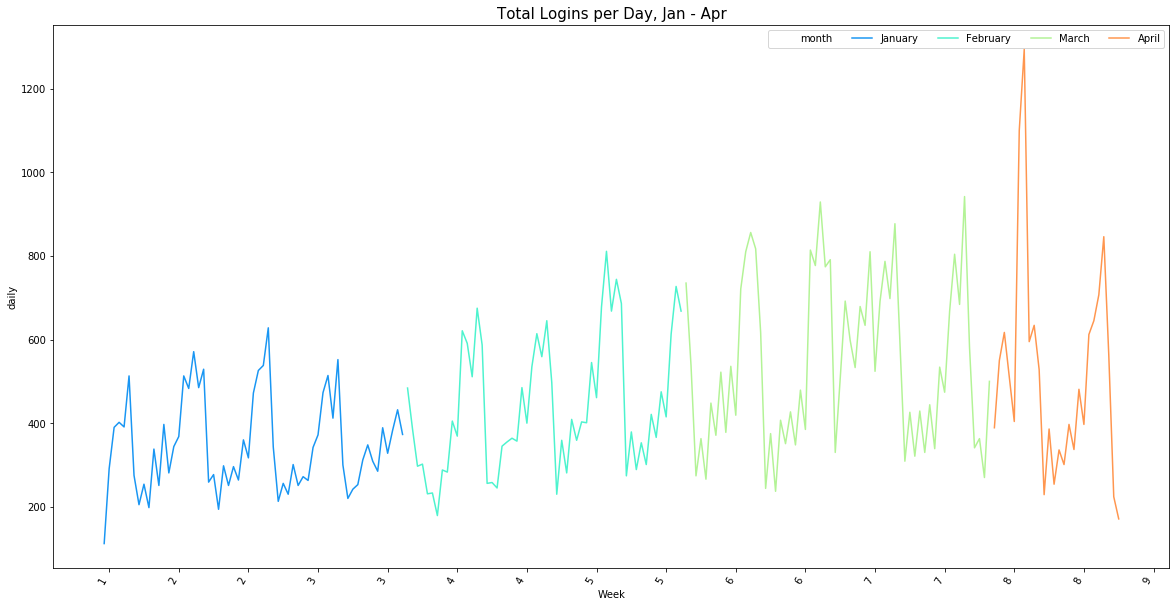

In [61]:
fig, axes = plt.subplots(figsize = (20, 10))
ax = sns.lineplot(x = 'idx', y = 'daily', data = daily, hue = 'month', palette = 'rainbow')
ax.legend(loc = 'upper right', ncol = 5)
plt.title("Total Logins per Day, Jan - Apr", size = 15)
plt.xlabel("Week")
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
ax.set_xticklabels(labels = daily['idx'].dt.day,
                  rotation = 60,
                  ha = 'right')

plt.show()

There appears to be a trend with increased usage as the weather gets warmer.

### Part 2: Experiment Metrics and Design

Gotham and Metropolis are neighboring cities with complimentary circadian rhythms, Gotham is active at night and Metropolis is more active during day, but each has reasonable activity on the weekends.

There's a toll bridge between the two cities that caues driver partners to be exclusive to each city.

City managers are proposing an experiment to encourage drivers to be available in both cities by reimursing toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to be available in both cities? Why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key metric.

- How will experiment be implemented
- What tests will be conducted
- How you would interpret the results.

### Answer:

An A/B test will be used to determine if there is causality that the toll bridge between the two cities affects the drivers moving between the two cities.

The metrics of interest will to be compared pre and post implementation of toll reimbursement will be:

- Daily Average Wait Time:
-- Average time from when a rider sends a request to when the driver arrives.

- Daily Average Rush Price:
-- Dollar per mile cost including surge pricing

- Daily Average Acceptance Rate:
-- Rate of rides requests drivers accept out of how many requests they receive (assuming denying requests is due to the drivers being far away from riders at the time of request)

The Null Hypothesis for the experiment is that the difference of the metrics before and after the toll reimbursement is zero, ie. there is no effect.
Each of our metrics of interest is on a daily frequency, but the Exploratory Data Analysis has shown some weekly trends. Thus, we will want to use an interval that encapsulates any anticipated cyclicality in the data. An interval of 30 days pre and post reimbursement should be enough to factor in any weekly trends. 

To test the Null Hypothessis, first start by shuffling the data. The shuffling will set a predetermined portion of the sample to be randomly assigned to have occurred with toll reimbursement. The target variable will be an increase in driver acceptance rate by 5%. The p-value is the probability that a driver accepted 5% rides due to the toll before pre-toll reimbursement in the randomized trial. With a p-value of 0.05, a 5% increase in driver acceptance rate would indicate statistical significance and rejection of the Null Hypothesis. 

Rejection of the Null Hypothesis would prove causality that toll reimbursement has been effective.

If Toll Reimbursement is shown to be effective, then it would need to be priced into the service since it would be an additional cost.

### Part 3: Predictive Modeling

Ultimate Technologies is interested in predicting rider retention. A sample dataset of users who signed up is provided. An active user is one that took a trip in the preceding 30 days.

What Ultimate is interested in:

1. What fraction of the users were reatined?

2. Building a predictive model to help Ultimate determine whether or not a user will be active in their 6th month. Discuss approach, alternatives, concerns. 

3. Discuss how Ultimate might leverage the insights granted from the model to improve rider-retention.

In [78]:
df = pd.read_json(r"ultimate_data_challenge.json")

In [79]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [80]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [81]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [82]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [92]:
'''
Users are considered active if they take a trip within 30 days of signing up.

Our data is only for riders that signed up in January of 2014. The data was pulled
several months later. For simplicity, we're assuming they're active if they took a trip
within 30 days of signing up instead of picking some arbitrary date in future.
'''
status = [lambda x: 1 if x != 0 else 0]

df['active'] = df.trips_in_first_30_days.apply(status)

In [93]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


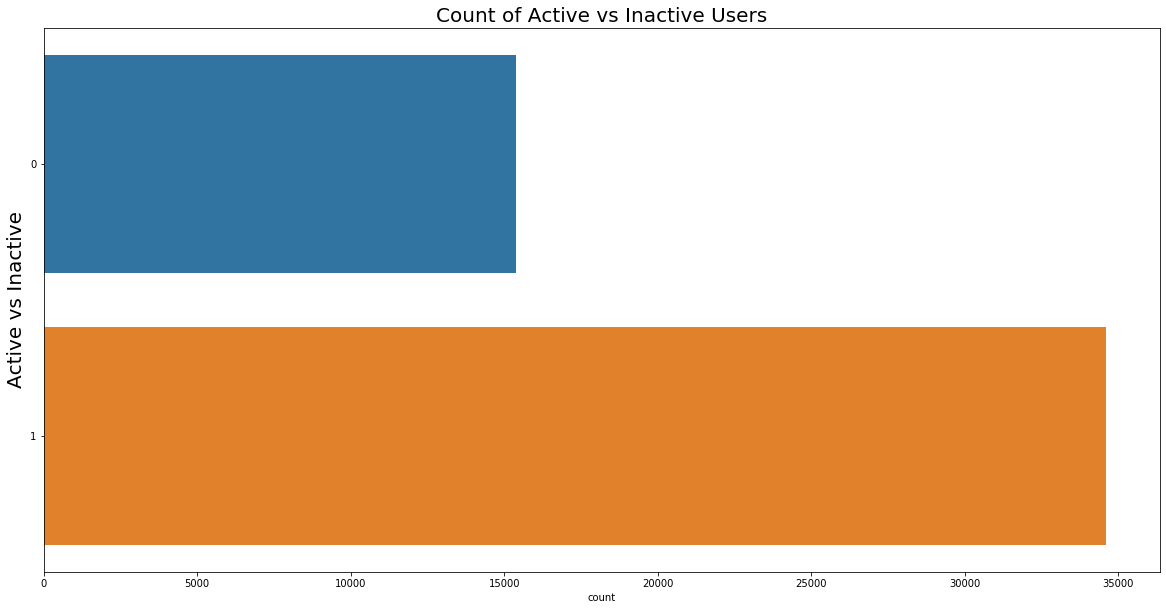

In [94]:
fig = plt.figure(figsize = (20, 10))
sns.countplot(y = df.active)
plt.title("Count of Active vs Inactive Users", size = 20)
plt.ylabel("Active vs Inactive", size = 20)
plt.show()

In [98]:
print(f"There are {len(df[df.active == 1])} active users.")
print(f"There are {len(df[df.active == 0])} inactive users.")

There are 34610 active users.
There are 15390 inactive users.


So roughly 2/3 of users are active and 1/3 of users are inactive

Ultimate Technologies is interested if a customer will be active in their sixth month after signing up. If the difference between the user's signup date and their last right is greater than 30 days * 5 months, we'll assume the customer to be active in their sixth month and consider the customer to be retained.

In [100]:
six_mo_active = [lambda x: 1 if x['last_trip_date'] - x['signup_date'] > timedelta(days = 150) else 0]

In [101]:
df['six_mo_active'] = df.apply(six_mo_active, axis = 1)

In [102]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,six_mo_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1,0


In [103]:
# creating a copy of the df in case there's a mistake
df_copy = df.copy()

In [104]:
# Check any NA's before modeling

print(df.isna().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
six_mo_active                0
dtype: int64


The avg_rating_of_driver and avg_rating_by_driver are numeric, so they'll be filled with the median. The median is used since median is not as prone to the effect of outliers as the mean.

The phone column will simply be filled with "Not Given".

In [105]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace = True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(), inplace = True)

In [106]:
print(df.isna().sum())

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
active                      0
six_mo_active               0
dtype: int64


That worked, so now to fill the phone column.

In [107]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [110]:
phone_type = [lambda x: "Not Given" if type(x) != str else x]

In [112]:
df['phone'] = df['phone'].apply(phone_type)

In [114]:
print(df.isna().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active                    0
six_mo_active             0
dtype: int64


In [115]:
df.phone.unique()

array(['iPhone', 'Android', 'Not Given'], dtype=object)

Zero NA's left in the DF. Phone column taken care of.

In [116]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int64
six_mo_active                      int64
dtype: object

ultimate_black_user will be changed from a boolean value to 0 and 1. The active feature and phone feature will also be changed to a category.

In [138]:
df.ultimate_black_user = df.ultimate_black_user.map({False: 0, True:1})

In [142]:
df.ultimate_black_user = df.ultimate_black_user.astype('category')
df.active = df.active.astype('category')
df.phone = df.phone.astype('category')

In [143]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                           category
surge_pct                        float64
ultimate_black_user             category
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                          category
six_mo_active                      int64
dtype: object

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

The target variable is six_mo_active so it will be the y after the train_test_split.



In [121]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'six_mo_active'],
      dtype='object')

In [152]:
X = df[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active']]

y = df[['six_mo_active']]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [154]:
print(X_train.shape)
print(y_train.shape)

(37500, 9)
(37500, 1)


In [155]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [10, 20, 50],
    'max_depth': [10, 20, 25],
}

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
rf = RandomForestClassifier()

In [158]:
grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 3, n_jobs = -1)

In [159]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [161]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 200}


In [165]:
print(f"Training accuracy score from tuned model: {grid_search.best_score_}")

Training accuracy score from tuned model: 0.7899733333333333


The best model is decently accurate. Now testing other metrics.

In [166]:
from sklearn import metrics

In [167]:
y_pred = grid_search.predict(X_test)

In [169]:
test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1 = metrics.f1_score(y_test, y_pred)

print(f"Test accuracy: {test_accuracy:.3f}%")
print(f"F1 Score: {test_f1:.3f} %")

Test accuracy: 0.787%
F1 Score: 0.438 %


The feature importances of the model show what the model views as most predictive.

In [173]:
rf = RandomForestClassifier(max_depth = 10, min_samples_split = 50, n_estimators = 200).fit(X_train, y_train)

feat_imp = rf.feature_importances_

In [174]:
print(feat_imp)

[0.05828267 0.04519538 0.13236463 0.22370302 0.0651342  0.1527146
 0.07545231 0.23401121 0.01314199]


In [175]:
feat_imps = zip(X_train.columns, feat_imp)
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse = True)

In [177]:
for feature, importance in feat_imps:
    print(f"Feature: {feature} | Importance: {importance:.3f}")

Feature: avg_rating_by_driver | Importance: 0.234
Feature: surge_pct | Importance: 0.224
Feature: weekday_pct | Importance: 0.153
Feature: avg_surge | Importance: 0.132
Feature: avg_dist | Importance: 0.075
Feature: ultimate_black_user | Importance: 0.065
Feature: trips_in_first_30_days | Importance: 0.058
Feature: avg_rating_of_driver | Importance: 0.045
Feature: active | Importance: 0.013


Avg_Rating_by_Driver and surge_pct were the two most importance features in whether or not a user was active after six months.

Avg_Rating_of_Driver and active were the two least important according to the model.

## Next Steps

A different classification model could be used to see if it has more predictive power (based on F1 score). K-Nearest Neighbors or Naive Bayes could be used for comparison.